In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import uniform, norm
from sklearn.linear_model import LinearRegression

from Tool_Functions import *
from Tool_Functions import data_gen_process


In [21]:
np.random.seed(42)

In [22]:
(beta1, beta2_values, M, n_train, n_test, seed, epsilon,
           x, x_train, x_test, epsilon_train, epsilon_test,
           liste_y, liste_y_train, liste_y_test)  = data_gen_process()

coefs_A, coefs_B, erreurs_A, erreurs_B = models_fit()
pa = erreurs_A[-1] # beta2 = 0.16
pb = erreurs_B[-1] # beta2 = 0.16
diff = pa - pb


In [24]:
def standard_error():

   mean_A = np.mean(pa)
   mean_B = np.mean(pb)
   mean_diff = np.mean(diff)

   se_A = np.std(pa)/(n_test**0.5)
   se_B = np.std(pb)/(n_test**0.5)
   se_diff = np.std(diff)/(n_test**0.5)

   return mean_A, mean_B, mean_diff, se_A, se_B, se_diff

def standard_error_boot():

   B = 250
   bootstrap_indices = np.random.choice(n_test, size=(B, n_test), replace=True)
   bootstrap = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(pa[indices])
      bootstrap.append(boot_mean)

   mean_A_boot = np.mean(bootstrap)
   se_boot_A = np.std(bootstrap)

   bootstrap = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(pb[indices])
      bootstrap.append(boot_mean)

   mean_B_boot = np.mean(bootstrap)
   se_boot_B = np.std(bootstrap)

   bootstrap = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(diff[indices])
      bootstrap.append(boot_mean)

   mean_diff_boot = np.mean(bootstrap)
   se_boot_diff = np.std(bootstrap)


   return mean_A_boot, mean_B_boot, mean_diff_boot, se_boot_A, se_boot_B, se_boot_diff

def confidence_interval_mean():

    mean_A, mean_B, mean_diff, se_A, se_B, se_diff = standard_error()

    t_critical = 1.96
    lower_A = mean_A - t_critical * se_A
    lower_B = mean_B - t_critical * se_B
    lower_diff = mean_diff - t_critical * se_diff
    upper_A = mean_A + t_critical * se_A
    upper_B = mean_B + t_critical * se_B
    upper_diff = mean_diff + t_critical * se_diff

    interval_A = pd.Interval(left=lower_A, right=upper_A, closed='both')
    interval_B = pd.Interval(left=lower_B, right=upper_B, closed='both')
    interval_diff = pd.Interval(left=lower_diff, right=upper_diff, closed='both')

    return interval_A, interval_B, interval_diff

def confidence_interval_perc_boot():

   alpha = 0.05
   B = 250

   bootstrap_indices = np.random.choice(n_test, size=(B, n_test), replace=True)

   moy_boot_A = []
   moy_boot_B = []
   moy_boot_diff = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(pa[indices])
      moy_boot_A.append(boot_mean)

   for indices in bootstrap_indices:
      boot_mean = np.mean(pb[indices])
      moy_boot_B.append(boot_mean)

   for indices in bootstrap_indices:
      boot_mean = np.mean(diff[indices])
      moy_boot_diff.append(boot_mean)

   lower_A = np.percentile(moy_boot_A, 100 * (alpha / 2))
   upper_A = np.percentile(moy_boot_A, 100 * (1 - alpha / 2))
   lower_B = np.percentile(moy_boot_B, 100 * (alpha / 2))
   upper_B = np.percentile(moy_boot_B, 100 * (1 - alpha / 2))
   lower_diff = np.percentile(moy_boot_diff, 100 * (alpha / 2))
   upper_diff = np.percentile(moy_boot_diff, 100 * (1 - alpha / 2))

   interval_A_boot = pd.Interval(left=lower_A, right=upper_A, closed='both')
   interval_B_boot = pd.Interval(left=lower_B, right=upper_B, closed='both')
   interval_diff_boot = pd.Interval(left=lower_diff, right=upper_diff, closed='both')

   return interval_A_boot, interval_B_boot, interval_diff_boot

def confidence_interval_basic_boot():
    
   alpha = 0.05
   B = 250

   bootstrap_indices = np.random.choice(n_test, size=(B, n_test), replace=True)

   moy_boot_A = []
   moy_boot_B = []
   moy_boot_diff = []

   for indices in bootstrap_indices:
      boot_mean = np.mean(pa[indices])
      moy_boot_A.append(boot_mean)

   for indices in bootstrap_indices:
      boot_mean = np.mean(pb[indices])
      moy_boot_B.append(boot_mean)

   for indices in bootstrap_indices:
      boot_mean = np.mean(diff[indices])
      moy_boot_diff.append(boot_mean)

   lower_A = np.percentile(moy_boot_A, 100 * (alpha / 2))
   upper_A = np.percentile(moy_boot_A, 100 * (1 - alpha / 2))
   lower_B = np.percentile(moy_boot_B, 100 * (alpha / 2))
   upper_B = np.percentile(moy_boot_B, 100 * (1 - alpha / 2))
   lower_diff = np.percentile(moy_boot_diff, 100 * (alpha / 2))
   upper_diff = np.percentile(moy_boot_diff, 100 * (1 - alpha / 2))

   interval_A_boot = pd.Interval(left=2*np.mean(pa)-upper_A, right=2*np.mean(pa)-lower_A, closed='both')

   interval_B_boot = pd.Interval(left=2*np.mean(pb)-upper_B, right=2*np.mean(pb)-lower_B, closed='both')

   interval_diff_boot = pd.Interval(left=2*np.mean(diff)-upper_diff, right=2*np.mean(diff)-lower_diff, closed='both')

   return interval_A_boot, interval_B_boot, interval_diff_boot


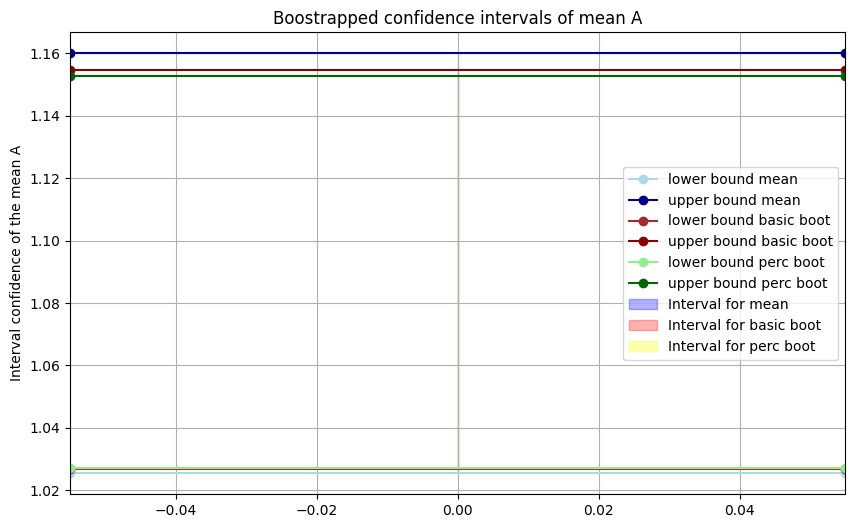

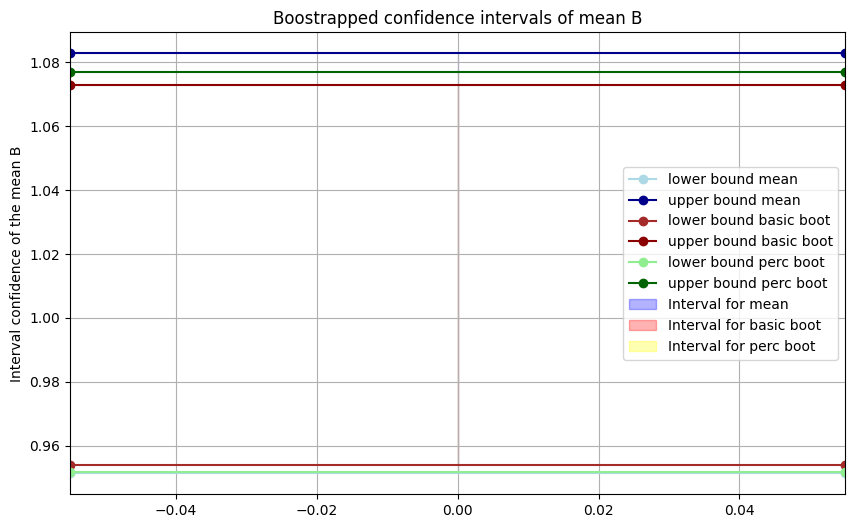

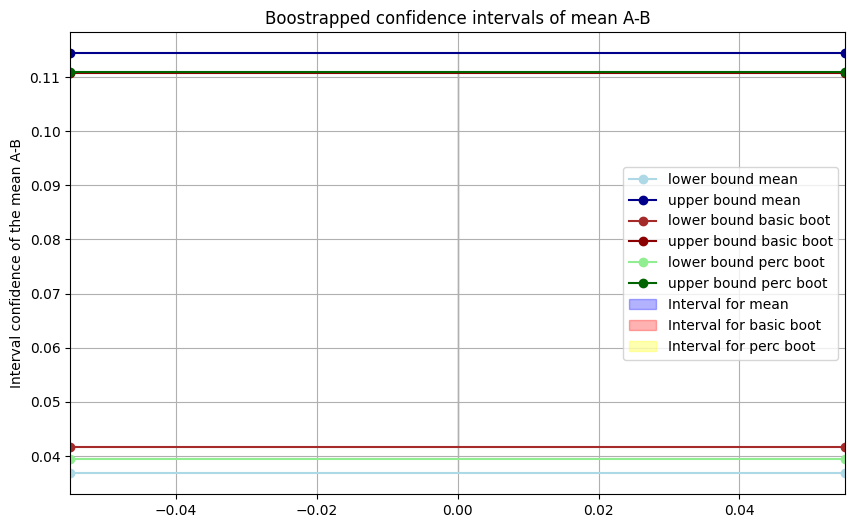

In [40]:

def plot_intervals():

    interval_A_boot, interval_B_boot, interval_diff_boot = confidence_interval_basic_boot()
    interval_A_boot_perc, interval_B_boot_perc, interval_diff_boot_perc = confidence_interval_perc_boot()
    interval_A, interval_B, interval_diff = confidence_interval_mean()

    def extract_bounds(intervals):
        if isinstance(intervals, pd.Interval):
            return [intervals.left], [intervals.right]
        elif all(isinstance(interval, pd.Interval) for interval in intervals):
            lower_bounds = [interval.left for interval in intervals]
            upper_bounds = [interval.right for interval in intervals]
            return lower_bounds, upper_bounds
        else:
            raise TypeError("All elements must be pandas Interval objects or a single Interval object")

    y1, y2 = extract_bounds(interval_A)
    y3, y4 = extract_bounds(interval_A_boot)
    y5, y6 = extract_bounds(interval_A_boot_perc)


    x = np.linspace(0,1,1)

    plt.figure(figsize=(10, 6))
    plt.axhline(y1, label='lower bound mean', marker='o', color="lightblue")
    plt.axhline(y2, label='upper bound mean', marker='o', color="darkblue")
    plt.axhline(y3, label='lower bound basic boot', marker='o', color="brown")
    plt.axhline(y4, label='upper bound basic boot', marker='o', color="darkred")
    plt.axhline(y5, label='lower bound perc boot', marker='o', color="lightgreen")
    plt.axhline(y6, label='upper bound perc boot', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for mean')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for basic boot')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for perc boot')
    plt.xlabel('')
    plt.ylabel('Interval confidence of the mean A')
    plt.title('Boostrapped confidence intervals of mean A, beta2 = 0.16')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    y1, y2 = extract_bounds(interval_B)
    y3, y4 = extract_bounds(interval_B_boot)
    y5, y6 = extract_bounds(interval_B_boot_perc)


    x = np.linspace(0,1,1)

    plt.figure(figsize=(10, 6))
    plt.axhline(y1, label='lower bound mean', marker='o', color="lightblue")
    plt.axhline(y2, label='upper bound mean', marker='o', color="darkblue")
    plt.axhline(y3, label='lower bound basic boot', marker='o', color="brown")
    plt.axhline(y4, label='upper bound basic boot', marker='o', color="darkred")
    plt.axhline(y5, label='lower bound perc boot', marker='o', color="lightgreen")
    plt.axhline(y6, label='upper bound perc boot', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for mean')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for basic boot')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for perc boot')
    plt.xlabel('')
    plt.ylabel('Interval confidence of the mean B')
    plt.title('Boostrapped confidence intervals of mean B, beta2 = 0.16')
    plt.legend()
    plt.grid(True)
    plt.show()

    y1, y2 = extract_bounds(interval_diff)
    y3, y4 = extract_bounds(interval_diff_boot)
    y5, y6 = extract_bounds(interval_diff_boot_perc)


    x = np.linspace(0,1,1)

    plt.figure(figsize=(10, 6))
    plt.axhline(y1, label='lower bound mean', marker='o', color="lightblue")
    plt.axhline(y2, label='upper bound mean', marker='o', color="darkblue")
    plt.axhline(y3, label='lower bound basic boot', marker='o', color="brown")
    plt.axhline(y4, label='upper bound basic boot', marker='o', color="darkred")
    plt.axhline(y5, label='lower bound perc boot', marker='o', color="lightgreen")
    plt.axhline(y6, label='upper bound perc boot', marker='o', color="darkgreen")

    plt.fill_between(x, y1, y2, color='blue', alpha=0.3, label='Interval for mean')
    plt.fill_between(x, y3, y4, color='red', alpha=0.3, label='Interval for basic boot')
    plt.fill_between(x, y5, y6, color='yellow', alpha=0.3, label='Interval for perc boot')
    plt.xlabel('')
    plt.ylabel('Interval confidence of the mean A-B')
    plt.title('Boostrapped confidence intervals of mean A-B, beta2 = 0.16')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:

def statistical_testing():

        mean_A, mean_B, mean_diff, se_A, se_B, se_diff = standard_error()
        mean_A_boot, mean_B_boot, mean_diff_boot, se_A_boot, se_B_boot, se_diff_boot = standard_error_boot()

        test_stat = mean_diff/se_diff

        student_bil = stats.t.ppf(0.975, df=n_test-1)
        p_value_bil = 1 - stats.t.cdf(abs(test_stat), df = n_test-1)
        student_right = stats.t.ppf(0.95, df=n_test-1)
        p_value_right = 1 - stats.t.cdf(test_stat, df=n_test-1)

        puissance_bil = 1 - stats.norm.cdf(student_bil - test_stat, 0, 1)
        puissance_right = 1 - stats.norm.cdf(student_right - test_stat, 0, 1)


        test_stat_boot = mean_diff_boot/se_diff_boot

        p_value_bil_boot = 1 - stats.t.cdf(abs(test_stat_boot), df = n_test-1)
        p_value_right_boot = 1 - stats.t.cdf(test_stat_boot, df=n_test-1)
        puissance_bil_boot = 1 - stats.norm.cdf(student_bil - test_stat_boot, 0, 1)
        puissance_right_boot = 1 - stats.norm.cdf(student_right - test_stat_boot, 0, 1)

        return p_value_bil, p_value_bil_boot, puissance_bil, puissance_bil_boot

def statistical_testing_varying_beta2():

   differences = [a - b for a, b in zip(erreurs_A, erreurs_B)]
   test_statistics = []
   p_values_r = []
   p_values_bil = []
   puissances_bil = []
   puissances_r = []

   for diff in differences:

      mean_diff = np.mean(diff)
      se_diff = np.std(diff)/(n_test**0.5)
      test_stat = mean_diff/se_diff
      student_bil = stats.t.ppf(0.975, df=n_test-1)
      student_right = stats.t.ppf(0.95, df=n_test-1)
      p_value_bil = 1 - stats.t.cdf(abs(test_stat), df = n_test-1)
      p_value_right = 1 - stats.t.cdf(test_stat, df=n_test-1)
      puissance_bil = 1 - stats.norm.cdf(student_bil - test_stat, 0, 1)
      puissance_right = 1 - stats.norm.cdf(student_right - test_stat, 0, 1)
   
      test_statistics.append(test_stat)
      p_values_r.append(p_value_right)
      p_values_bil.append(p_value_bil)
      puissances_bil.append(puissance_bil)
      puissances_r.append(puissance_right)

   return  test_statistics , p_values_r , p_values_bil , puissances_bil , puissances_r  

def plot_tests():

   test_statistics , p_values_r , p_values_bil , puissances_bil , puissances_r  = statistical_testing_varying_beta2()

   plt.figure()
   plt.title("Statistiques de test en fonction de beta2")
   plt.plot(beta2_values, test_statistics, label = "Statistiques de test")
   plt.grid()
   plt.legend()
   plt.show()

   plt.figure()
   plt.title("P values du test en fonction de beta2")
   plt.plot(beta2_values, p_values_bil, label = "p-values du test bilatéral")
   plt.plot(beta2_values, p_values_r, label = "p-values du test unilatéral")
   plt.grid()
   plt.legend()
   plt.show()

   plt.figure()
   plt.title("Puissance du test en fonction de beta2")
   plt.plot(beta2_values, puissances_bil, label = "Puissance du test bilateral")
   plt.plot(beta2_values, puissances_r, label = "Puissance du test unilateral")
   plt.grid()
   plt.legend()
   plt.show()
   

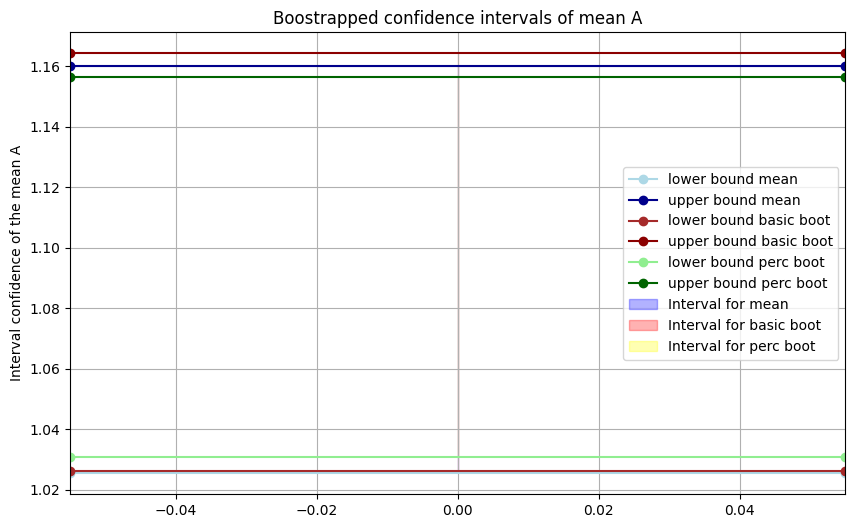

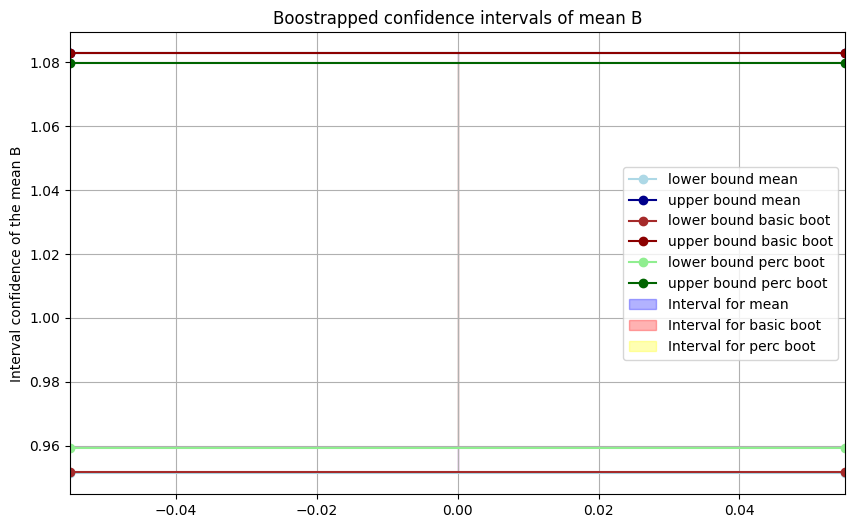

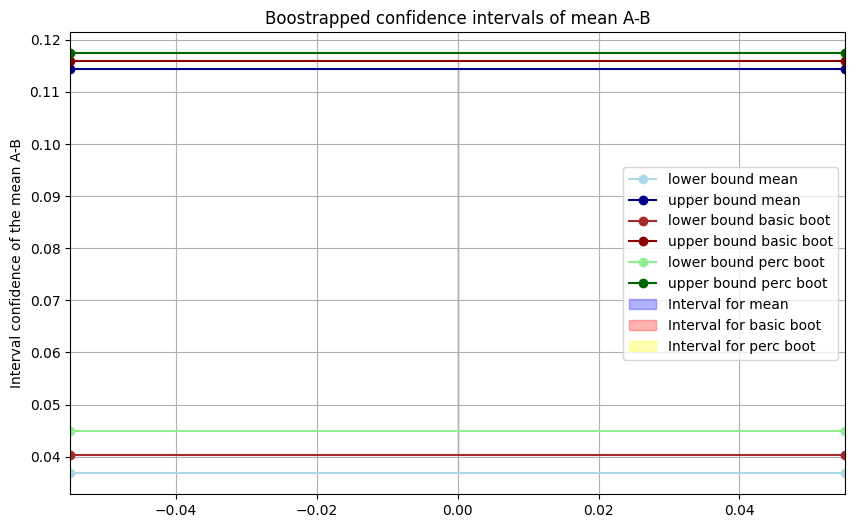

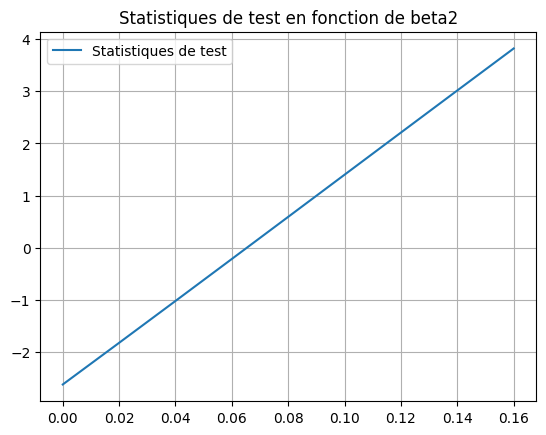

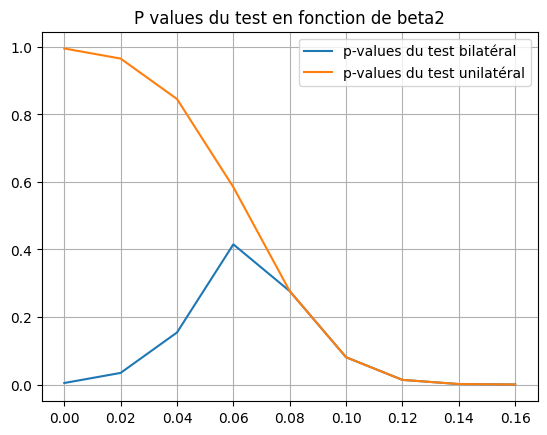

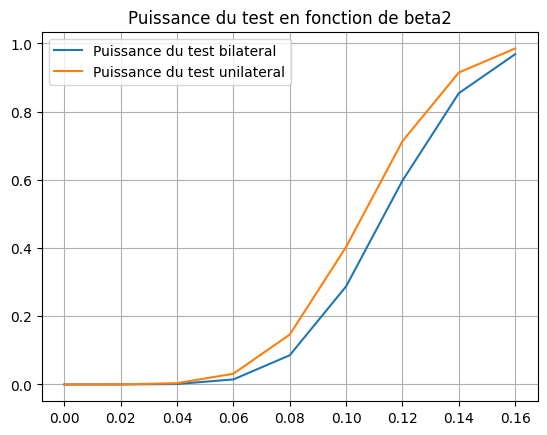

In [41]:
plot_intervals()
plot_tests()